In [1]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 17572 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

In [15]:
cnn = tf.keras.models.load_model('trained_plant_disease_model.keras')

In [21]:
!pip install opencv-python

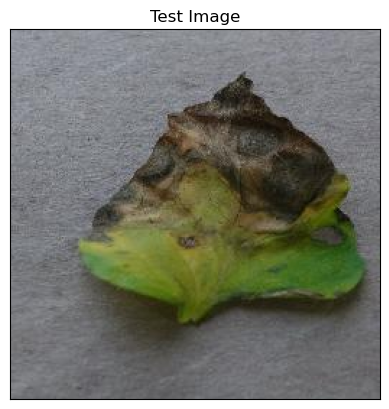

In [49]:
#Test Image Visualization
import cv2
image_path = 'test/TomatoEarlyBlight2.JPG'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [50]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)
predictions.shape

1/1 [==============================] - 0s 85ms/step


(1, 38)

In [51]:
print(predictions)

[[2.37661903e-03 6.74810508e-05 2.04751864e-02 1.94268068e-04
  2.94415280e-04 8.26389078e-05 3.55415523e-06 4.14616242e-03
  5.59480213e-05 5.61917514e-05 2.81970460e-06 1.03218143e-03
  2.58042794e-02 1.36585231e-03 1.06448693e-04 1.58755392e-05
  1.20304176e-04 8.08166715e-06 6.96642455e-05 2.91594042e-05
  2.66017439e-03 5.52628143e-03 3.76693642e-04 1.29719818e-04
  1.32599316e-05 4.95775312e-04 2.49166135e-03 6.23805818e-06
  1.36984279e-02 2.78960377e-01 5.13989985e-01 7.27809453e-03
  1.11206293e-01 1.79934621e-04 2.88883829e-03 1.27207910e-04
  2.53886473e-03 1.12506398e-03]]


In [52]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

30


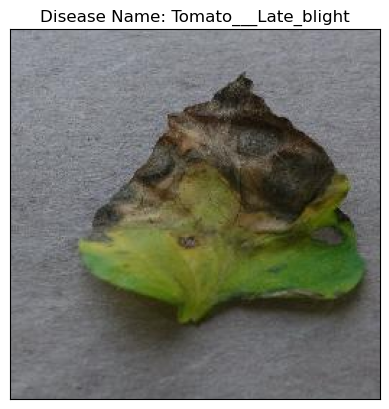

In [53]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()